In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Markdown as md
from copy import deepcopy
import scipy
from scipy import signal
import seaborn as sns
plt.rcParams['figure.figsize'] = [18, 5]

,A1: 2N:30s,A2: 2N:45s,A3: 2N:1min,A4: 2N:2min,A5: 2N:3min,A6: 2N:5min,A7: 2N:7min,A8: 2N:10min,A9: 2N:15min,A10: 2N:20min,...,H3: 40N:1min,H4: 40N:2min,H5: 40N:3min,H6: 40N:5min,H7: 40N:7min,H8: 40N:10min,H9: 40N:15min,H10: 40N:20min,H11: 40N:30min,H12: SampH12
Size (nt),,,,,,,,,,,,,,,,,,,,,
0.30,198.50,279.69,267.72,254.48,334.85,280.15,243.79,217.11,287.62,227.10,...,401.16,371.66,399.11,315.79,308.84,460.42,308.91,315.62,371.46,1250.33
0.47,321.74,422.15,409.70,403.99,502.07,436.01,393.42,366.88,442.12,378.52,...,598.85,545.44,613.61,496.02,496.39,674.77,484.98,509.68,566.47,2032.70
0.65,433.76,526.32,518.91,532.03,620.95,563.89,529.85,515.39,562.51,527.82,...,738.84,662.20,778.47,644.71,663.43,817.70,632.93,685.93,710.22,2713.89
0.82,485.62,541.74,543.05,580.40,633.11,604.30,593.03,599.64,590.75,611.99,...,751.78,663.66,813.76,692.38,735.39,818.39,685.00,766.30,732.18,2983.54
1.00,452.00,460.13,469.51,524.50,531.68,536.12,551.08,577.30,511.13,589.03,...,629.60,547.95,699.92,613.82,675.60,675.35,614.50,709.93,619.92,2707.21


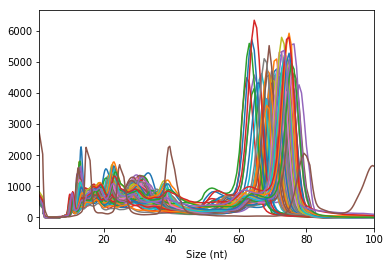

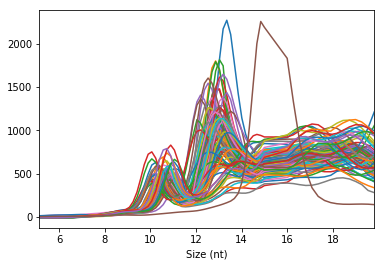

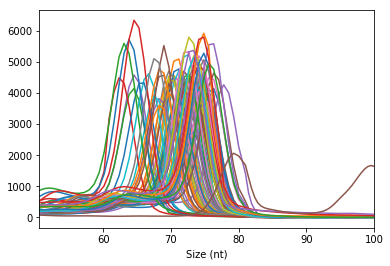

In [2]:
df = pd.read_csv('./2019 03 18 12H 56M Electropherogram.csv')
df.set_index('Size (nt)', inplace=True)
display(df.head())
df.loc[1:100, df.columns != "H12"].plot(legend = False)
df.loc[5:20, df.columns != "H12"].plot(legend = False)
df.loc[50:100, df.columns != "H12"].plot(legend = False)

In [3]:
cols = ["A", "B", "C", "D", "E", "F", "G", "H"]
rows = [str(x) for x in range(1,13)]

newNames = {}
sampleMap = {}
for col in df.columns:
    if ": " in col:
        splt = col.split(": ")
        newNames[col] = splt[0]
        sampleMap[splt[0]] = splt[1]
    else:
        sampleMap[col] = col
df.rename(columns=newNames, inplace=True)
#display(df)

In [4]:
for col in cols:
    for row in rows:
        df[col+row] = df[col+row]/df.index

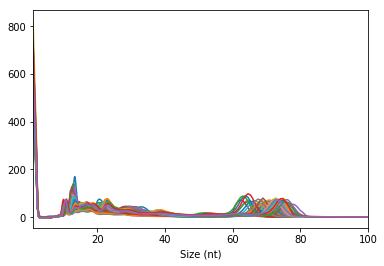

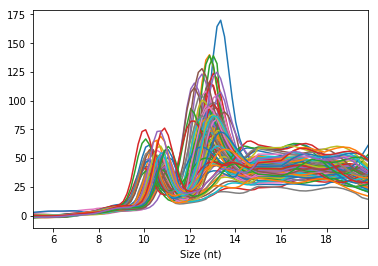

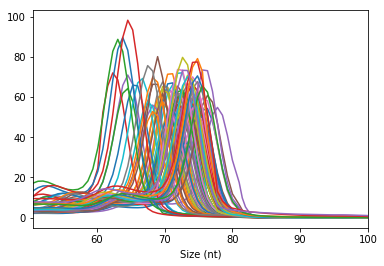

In [5]:
df.loc[1:100, df.columns != "H12"].plot(legend = False)
df.loc[5:20, df.columns != "H12"].plot(legend = False)
df.loc[50:100, df.columns != "H12"].plot(legend = False)

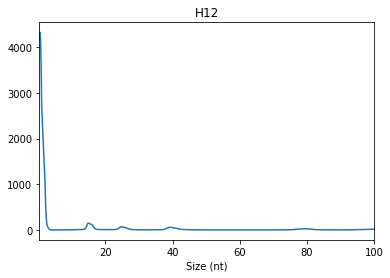

In [6]:
df.loc[0:100, "H12"].plot(title="H12")

Looking for the controooools in this?

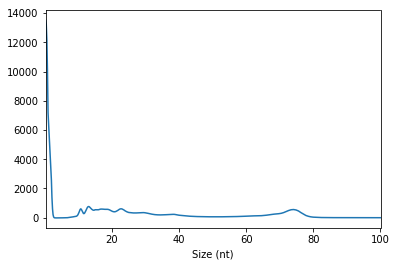

In [7]:
newDf = deepcopy(df)

def m(cell, cellTwo):
    return cell+"-"+cellTwo

for col in cols:
    oldCell = ""
    for row in rows:
        cell = col+row
        if cell == "H12":
            break
        if oldCell == "":
            newDf["All Mult."] = newDf[cell]
        else:
            newDf["All Mult."] = newDf[cell]+newDf["All Mult."]
        oldCell = "adsflh"
newDf.loc[0:100, "All Mult."].plot()

Found no injectPeak peaks for A2
Found no injectPeak peaks for A3
Found no injectPeak peaks for A5
Found no injectPeak peaks for A6
Found no injectPeak peaks for A9
Found no injectPeak peaks for A11
Found no injectPeak peaks for B1
Found no injectPeak peaks for B3
Found no injectPeak peaks for B4
Found no injectPeak peaks for B6
Found no injectPeak peaks for B8
Found no injectPeak peaks for B9
Found no injectPeak peaks for B11
Found no secondPeak peaks for B12
Found no injectPeak peaks for B12
Found no injectPeak peaks for C2
Found no injectPeak peaks for C5
Found no injectPeak peaks for C6
Found no injectPeak peaks for C7
Found no injectPeak peaks for C8
Found no injectPeak peaks for C9
Found no injectPeak peaks for C10
Found no secondPeak peaks for C12
Found no injectPeak peaks for C12
Found no injectPeak peaks for D1
Found no injectPeak peaks for D4
Found no lastPeak peaks for D5
Found no injectPeak peaks for D8
Found no injectPeak peaks for D10
Found no secondPeak peaks for D12
Fou

,Nuc.,time (s),secondPeak: Location,secondPeak: Height,lastPeak: Location,lastPeak: Height,injectPeak: Location,injectPeak: Height
A1,2,30,11,169.951,35,54.2541,1,684.553
A10,2,1200,8,87.9051,28,66.0639,2,812.031
A11,2,1800,8,82.7387,28,66.994,NaN,NaN
A12,2,Cont,13,35.9115,28,71.5477,1,989.277
A2,2,45,8,139.937,30,56.0999,NaN,NaN


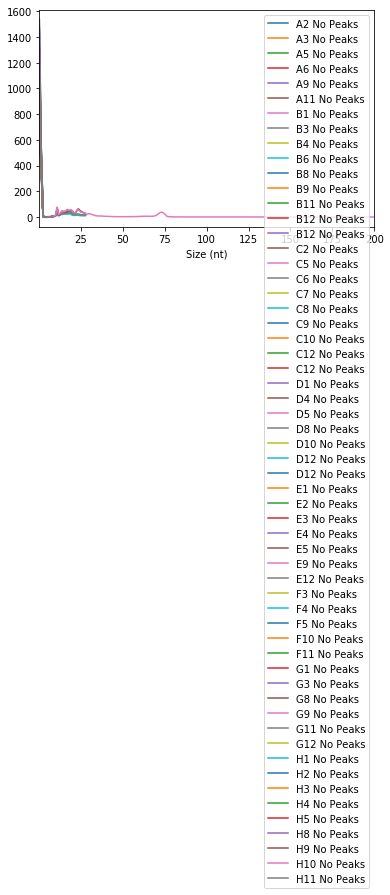

In [10]:
newDf = deepcopy(df)
peaks = {"injectPeak": [0,4,200], "secondPeak":[11.5,14,25], "lastPeak":[50,100,40]}
sampleVars = {} # nuc, time (s)
for col in cols:
    for row in rows:
        if not col+row == "H12":
            var = sampleMap[col+row].split("N:")
            nucs = int(var[0])
            time = var[1]
            if "s" in time:
                time = time.replace("s","")
                time = float(time)
            elif "min" in time:
                time = time.replace("min","")
                time = float(time)*60
            varArr = [nucs, time]
            for peak in peaks:
                foundPeaks = scipy.signal.find_peaks(list(newDf.loc[peaks[peak][0]:peaks[peak][1], col+row]), height=peaks[peak][2])
                if len(foundPeaks[0])==0:
                    print("Found no", peak, "peaks for",col+row)
                    df.loc[peaks[peak][0]/2:peaks[peak][1]*2, col+row].plot(label=col+row+" No Peaks", legend=True)
                    varArr.extend([np.nan, np.nan])
                else:
                    if not len(foundPeaks[0]) == 1:
                        print("AHH MULTIPLE PEAKS", col+row, peak, foundPeaks)
                        df.loc[peaks[peak][0]:peaks[peak][1], col+row].plot(label=col+row+": peaks at"+str(foundPeaks), legend=True)
                    peakloc = foundPeaks[0][0]
                    peakheight = foundPeaks[1]["peak_heights"][0]
                    varArr.extend([peakloc, peakheight])
            sampleVars[col+row] = varArr
vals = pd.DataFrame.from_dict(sampleVars)
vals = vals.T
vals.rename(columns={0:"Nuc.",1:"time (s)"}, inplace=True)
pos = 2
for peak in peaks:
    vals.rename(columns={pos:peak+": Location",pos+1:peak+": Height"}, inplace=True)
    pos = pos+2
display(vals.head())

,Nuc.,time (s),secondPeak: Location,secondPeak: Height,lastPeak: Location,lastPeak: Height,injectPeak: Location,injectPeak: Height
Nuc.,1.000000e+00,3.220002e-18,0.125311,-0.159860,-0.011926,0.567372,-0.184001,0.678699
time (s),3.220002e-18,1.000000e+00,0.378569,-0.671947,-0.172466,0.142382,-0.068854,0.033861
secondPeak: Location,1.253107e-01,3.785692e-01,1.000000,-0.395550,0.653330,-0.134221,-0.228602,0.345350
secondPeak: Height,-1.598602e-01,-6.719466e-01,-0.395550,1.000000,0.203159,-0.015298,-0.013821,-0.079750
lastPeak: Location,-1.192581e-02,-1.724665e-01,0.653330,0.203159,1.000000,-0.415622,-0.249221,0.330590
lastPeak: Height,5.673724e-01,1.423817e-01,-0.134221,-0.015298,-0.415622,1.000000,0.015470,0.748138
injectPeak: Location,-1.840012e-01,-6.885409e-02,-0.228602,-0.013821,-0.249221,0.015470,1.000000,-0.254570
injectPeak: Height,6.786989e-01,3.386052e-02,0.345350,-0.079750,0.330590,0.748138,-0.254570,1.000000


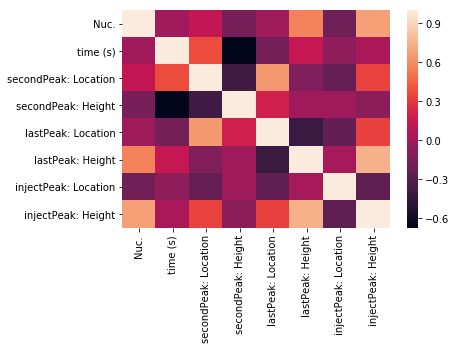

In [11]:
modvals = vals.replace("Cont", np.nan).astype(float)
corr = modvals.corr()
display(corr)
display(sns.heatmap(corr))

In [ ]:
df.loc[11.5:14, df.columns != "H12"].plot(legend = False)

In [ ]:
df.loc[7:14, df.columns != "H12"].plot(legend = False)

In [ ]:
df.loc[11.5:14, "D12"].plot(title="A12")